
# Penguins Dataset

<img src="https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png" alt="Drawing" style="width: 400px;"/>

<img src="https://allisonhorst.github.io/palmerpenguins/reference/figures/culmen_depth.png" alt="Drawing" style="width: 350px;"/>

We're going to be using a publicly available dataset called Palmer Penguins, which contains morphological measurements from three species of penguin. 
 


# Initialising your Notebook in Google Colab



In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as multi
import statsmodels.api as sm

# If you are running your python locally, you will need to install 
# this on your machine. Here I am using "pip" to install it to 
# Google Colab's machine instead. 

!pip install palmerpenguins

# Import the Palmer Penguins dataset
from palmerpenguins import load_penguins

# Set figure styles -- this makes the plots look nicer in style. 
sns.set_theme(style="white")
sns.set_style("white")

# High resolution plots in the notebook preview. You will have to change the size and resolution yourself if you are saving them to a file.
%config InlineBackend.figure_format = 'retina'


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


# How to use Panda Dataframes

Pandas dataframes are extremely helpful for looking at, plotting, cleaning, and subsetting `.csv`/spreadsheet data. 

## Load data using Pandas methods

Methods are functions you can do to a dataframe, you call them by having a full stop and there are roung brackets afterwards.

`dataframe.head()`

Usually if you want to do something, there's a dataframe method for that!

In [138]:
# First load the data from the palmerpenguins package

penguins = load_penguins()

# ---- Dataframe Methods -----
# Print the first 5 rows of the data
penguins.head()

# Summary stats for the data 
penguins.describe()

# The data types in each column
penguins.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


## Looking at Individual Rows and Columns and Values in the Dataframe

In [139]:

# An individual column
penguins["species"]

# A single value
penguins["species"][0]

# Several rows using .loc()
penguins.loc[0:10,"species"]

# Several columns and rows using .iloc() and numerical refs. If you know the column names, you can use .loc() instead. 
penguins.iloc[0:10,[0,2]] 

# It is better to use .loc() because it uses english. 
penguins.loc[0:10,["species","bill_length_mm"]]




,species,bill_length_mm
0,Adelie,39.1
1,Adelie,39.5
2,Adelie,40.3
3,Adelie,NaN
4,Adelie,36.7
5,Adelie,39.3
6,Adelie,38.9
7,Adelie,39.2
8,Adelie,34.1
9,Adelie,42.0


## Categorical Data in the Dataframe

In [140]:

# Looking at how many unique species there are 
penguins["species"].unique()

# You can chain methods together.
species_names_list = penguins["species"].unique().tolist()

# Looking at how many examples of each species there are
penguins["species"].value_counts()

# Looking at the number of unique islands
penguins["island"].nunique()

# Changing the species column to categorical type data. This will be important later for plotting. 
penguins["species"] = penguins.species.astype("category")

## Finding and Fixing Problems with Data

This is **Data Cleaning**. Always have a safe copy of your raw data. The following steps are examples of code that should be **reproducible**, for example stored in a specific `cleaning.py`. 

As you can see, I don't overwrite the raw data, instead I make a new variable. 

In [141]:
# Check for missing values. isna() returns a boolean array of the same size as the data frame, if there is a missing value it will be True. sum() adds up the number of True values in each column.
penguins.isna().sum()

# Ensuring a hard copy of the data is made. Sometimes you will encounter errors with soft copying in Python. 
penguins_clean = penguins.copy()

# Drop rows with missing values
penguins_clean = penguins.dropna()

# Check the column names are suitable
penguins_clean.columns



Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

## Quick plotting the data with Pandas

Pandas has a built in plotting function that is very useful for quickly plotting data.

<AxesSubplot: xlabel='body_mass_g', ylabel='bill_depth_mm'>

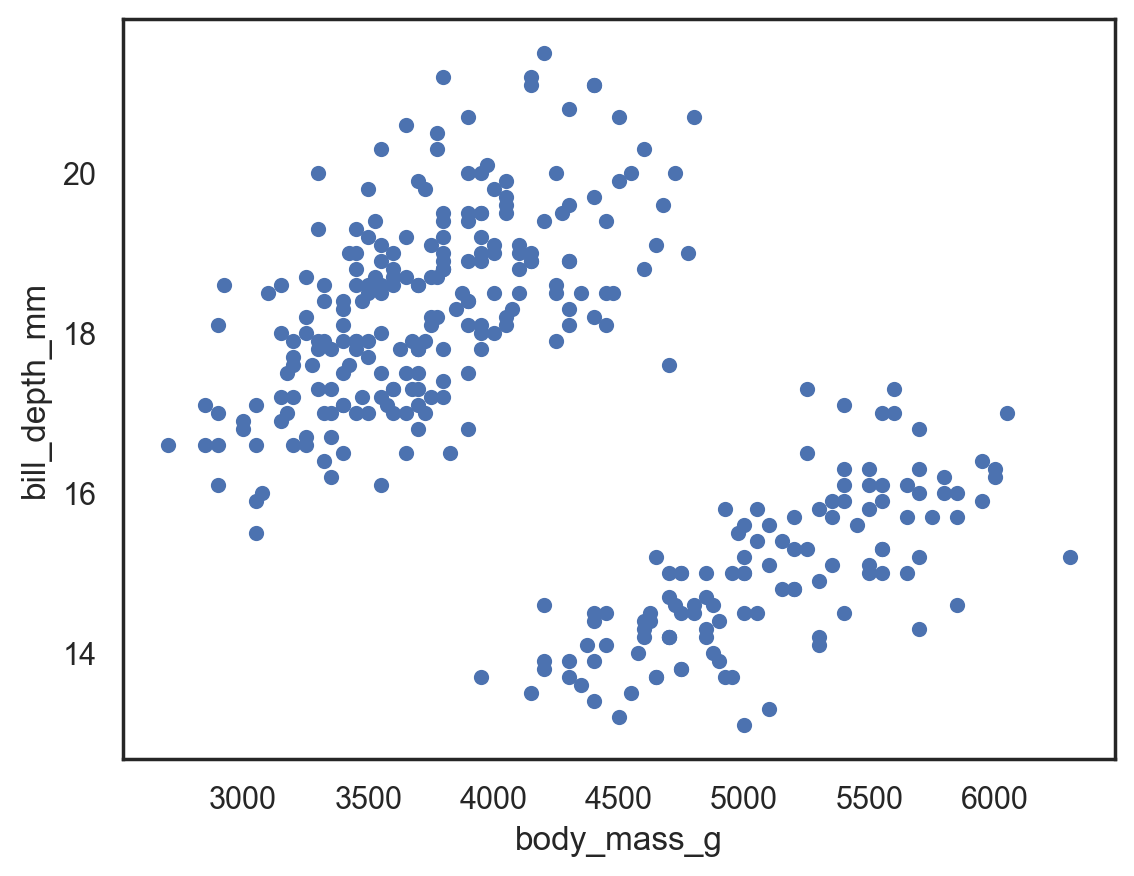

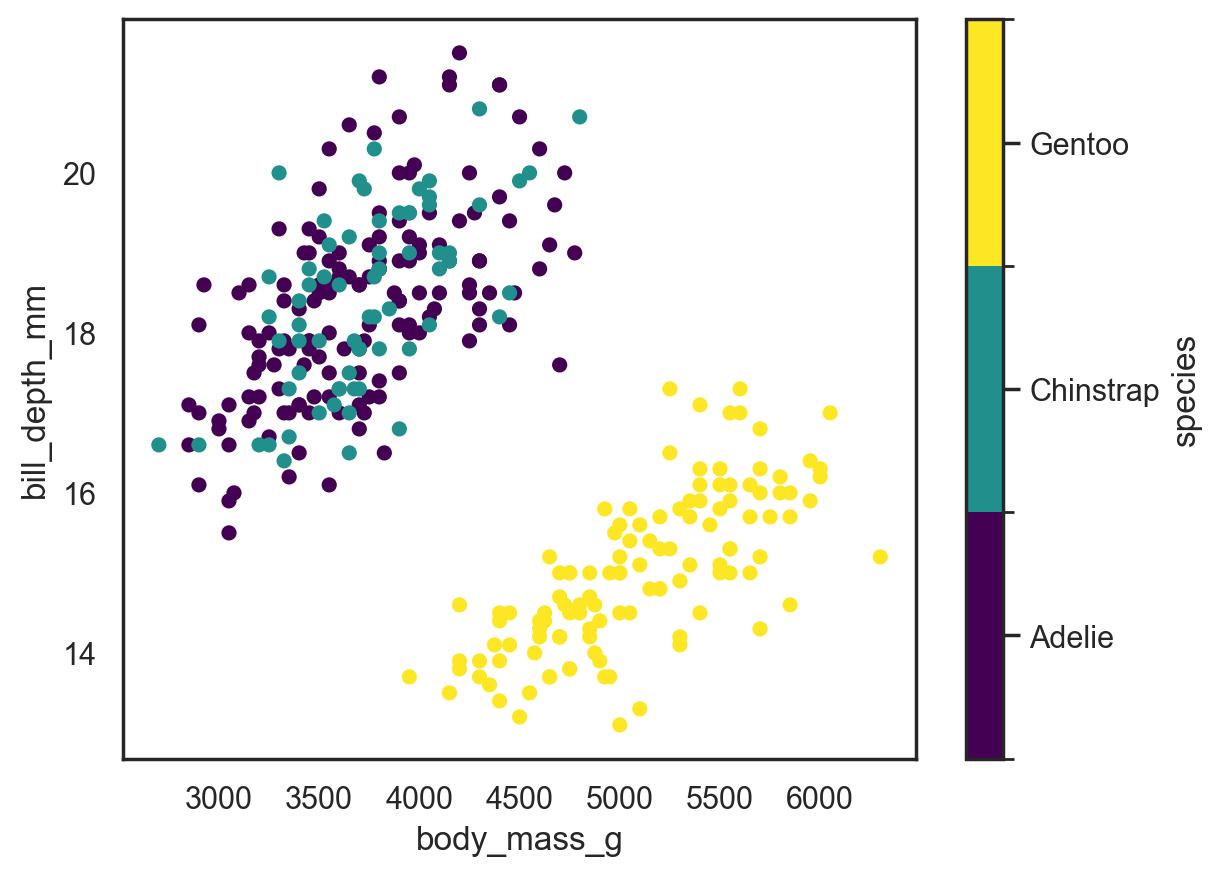

In [142]:

# Plot the body mass vs bill depth
penguins_clean.plot.scatter(x="body_mass_g", y="bill_depth_mm")

# Plot the body mass vs bill depth with different colors for each species. Species is a category which gives us this ability. 
penguins_clean.plot.scatter(x="body_mass_g", 
                            y="bill_depth_mm", 
                            c="species", 
                            colormap="viridis")



## Boolean Masking

If we want to subset data based on a rule ("only Adelie penguins" or "every penguin with a mass less than 4500g") then a boolean mask is used. 

In [143]:
# A boolean mask -- printing this is a row of True and False values. 
penguins_clean["species"] == "Adelie"

# You can save the mask as a variable
is_adelie = penguins_clean["species"] == "Adelie"

# You can the use the mask to select rows from the data frame.
penguins_clean[is_adelie]

# All in one step
penguins_clean[penguins_clean["species"] == "Adelie"]

# Save the subset data frame as a new variable
adelie_penguins = penguins_clean[penguins_clean["species"] == "Adelie"]




# Plotting with Matplotlib

More advanced figure plotting is possible with matplotlib. 

## A figure with two penguin species

First I will use several lines of code so you can see the steps. This is quite repetitive...

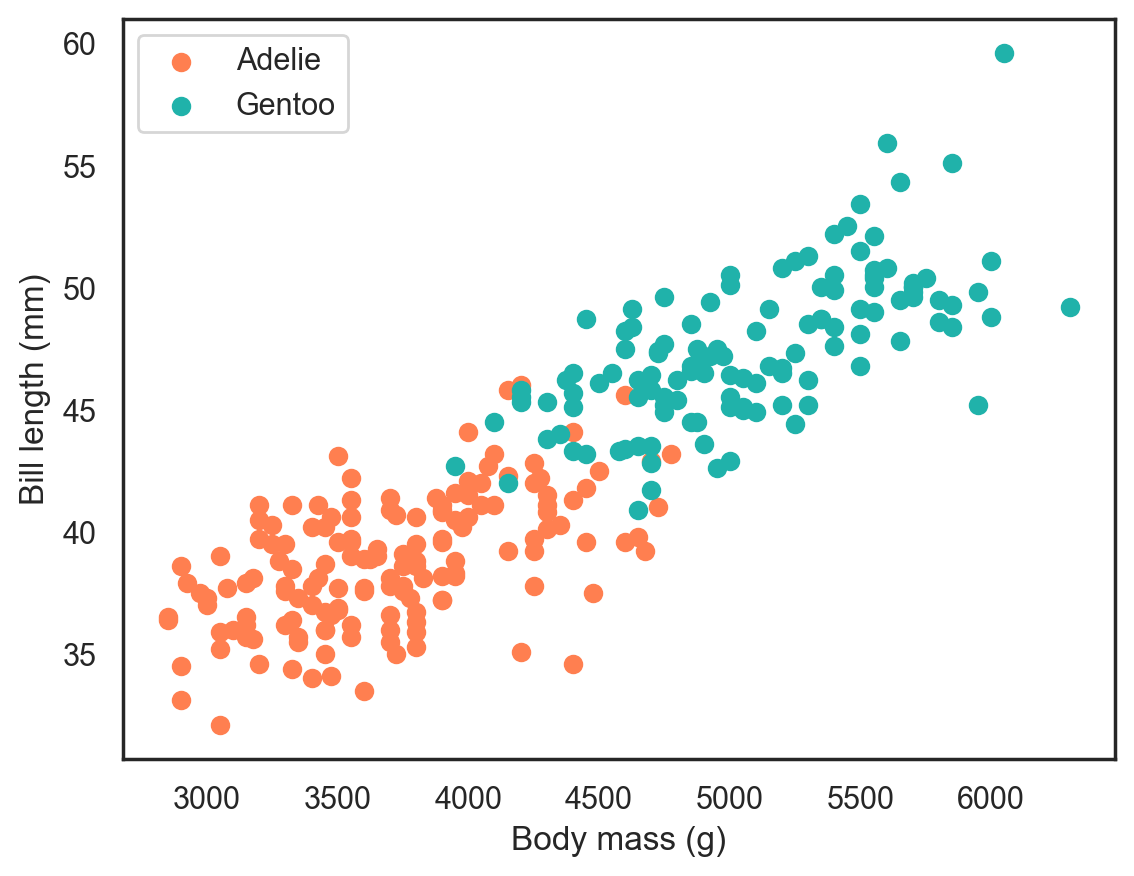

In [163]:

# First we subset the data to a single species
adelie_only = penguins[penguins["species"] == "Adelie"]
gentoo_only = penguins[penguins["species"] == "Gentoo"]

# The first plot with matplotlib (we imported it with a shorter name as plt)
# -- First we give the columns we want to plot against each other. 
# -- Then we give this a label for the legend (we we call at the end)
# -- Then we give the color (matching the image at the top of the notebook)
plt.scatter(adelie_only["body_mass_g"],
            adelie_only["bill_length_mm"],
            label="Adelie", 
            color = "coral")

# The second plot with matplotlib, it will plot to the same axes. 
plt.scatter(gentoo_only["body_mass_g"],
            gentoo_only["bill_length_mm"], 
            label="Gentoo",
            color = "lightseagreen")

# Additional plot features
plt.xlabel("Body mass (g)")
plt.ylabel("Bill length (mm)")

# Adding the legend, which uses the labels we gave to the plots. 
plt.legend() 

## Matplotlib with a For Loop

We will need a list of species and a dictionary to help us. 

In [145]:
# Define the two dictionary for us to use
colour_dict = {"Adelie"    :  "coral", 
               "Gentoo"    :  "lightseagreen", 
               "Chinstrap" :  "mediumorchid"}
# A dictionary gives us the ability to get the second value from the first.
print(colour_dict["Adelie"])

# If we want all the first values (keys)
print(colour_dict.keys())

# If we want all the second values (values)
print(colour_dict.values())

# ----------------------------
# Next we need a list of species. 
# Python lets us chain methods together.
species_list = penguins["species"].unique().tolist()



coral
dict_keys(['Adelie', 'Gentoo', 'Chinstrap'])
dict_values(['coral', 'lightseagreen', 'mediumorchid'])


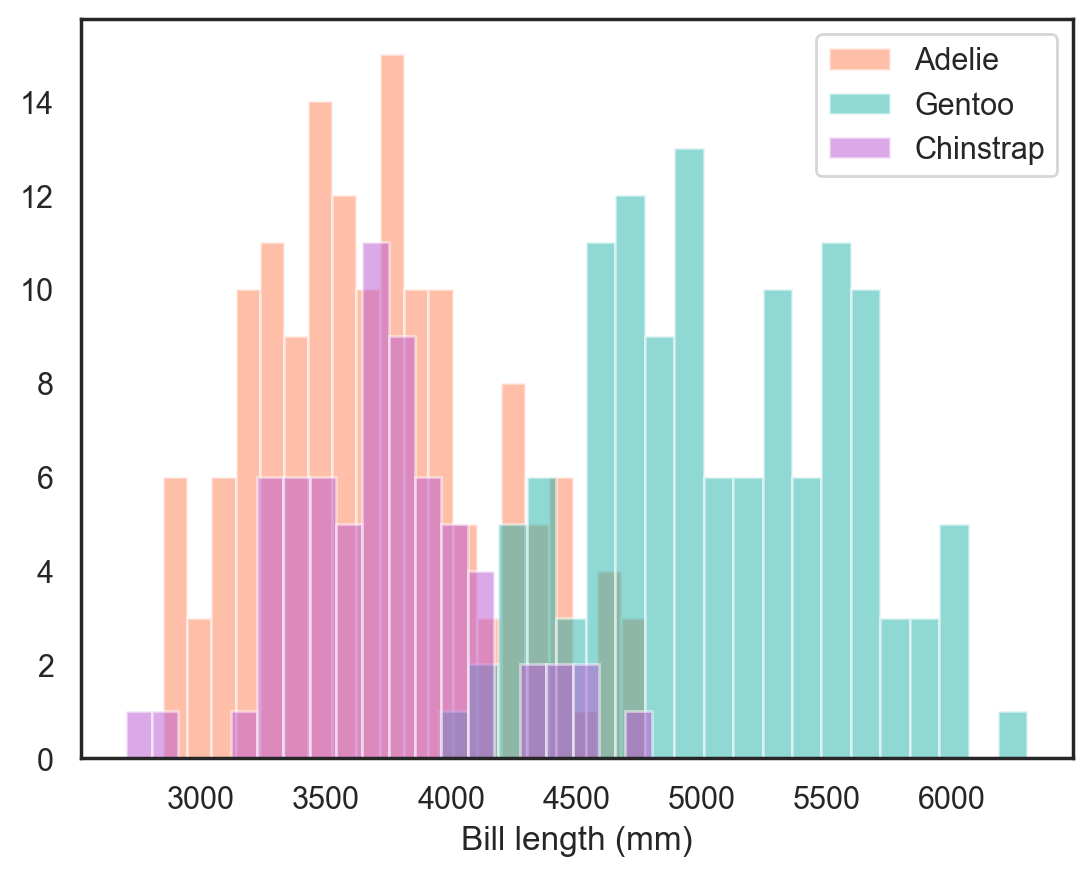

In [146]:

species_list = penguins["species"].unique().tolist()
colour_dict = {"Adelie"    :  "coral", 
               "Gentoo"    :  "lightseagreen", 
               "Chinstrap" :  "mediumorchid"}

# We can use a for loop to plot each species.

for species in species_list:
    # We can use the species name to select the rows for that species.
    species_only = penguins[penguins["species"] == species]

    # We can plot the data for that species. The alpha value controls the transparency.
    plt.hist(species_only["body_mass_g"],
             bins = 20, 
             label = species,
             color = colour_dict[species],
             alpha = 0.5)

# This is outside the for loop, so it will only run once.
plt.xlabel("Bill length (mm)")
plt.legend()

## Plotting in Matplotlib using A Function

Of course, we want to make functions wherever we can. 

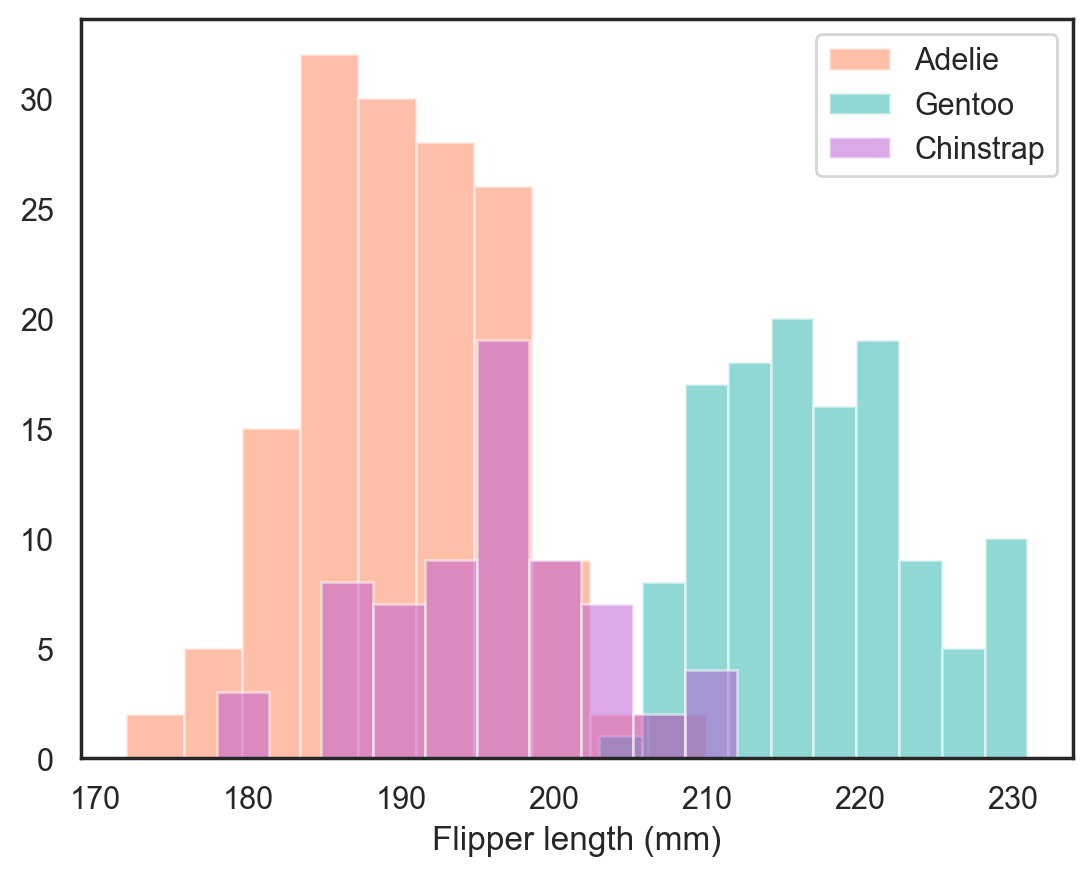

In [147]:
def hist_plot_by_species(penguin_data, variable_name):
    """
    This function plots a scatter plot of body mass vs bill length for each species.
    """
    species_list = penguin_data["species"].unique().tolist()

    colour_dict = {"Adelie"    :  "coral", 
                   "Gentoo"    :  "lightseagreen", 
                   "Chinstrap" :  "mediumorchid"}
    axis_label_dict = {"body_mass_g"      : "Body mass (g)",
                        "bill_length_mm"  : "Bill length (mm)",     
                        "bill_depth_mm"   : "Bill depth (mm)",
                        "flipper_length_mm" : "Flipper length (mm)"}

    for species in species_list:
        species_only = penguin_data[penguin_data["species"] == species]

        plt.hist(species_only[variable_name],
                    bins = 10, 
                    label = species,
                    color = colour_dict[species],
                    alpha = 0.5)

    plt.xlabel(axis_label_dict[variable_name])
    plt.legend()


# Now we can repeat the plot for any two variables. Try uncommenting the lines below one by one. 

# scatter_plot_by_species(penguins, "body_mass_g", "bill_length_mm")
# scatter_plot_by_species(penguins, "body_mass_g", "flipper_length_mm")
hist_plot_by_species(penguins, "flipper_length_mm")

# Having code in a function means we can use it again and again. This is reproducible and repeatable code!


## For Loops for Subplots in Matplotlib

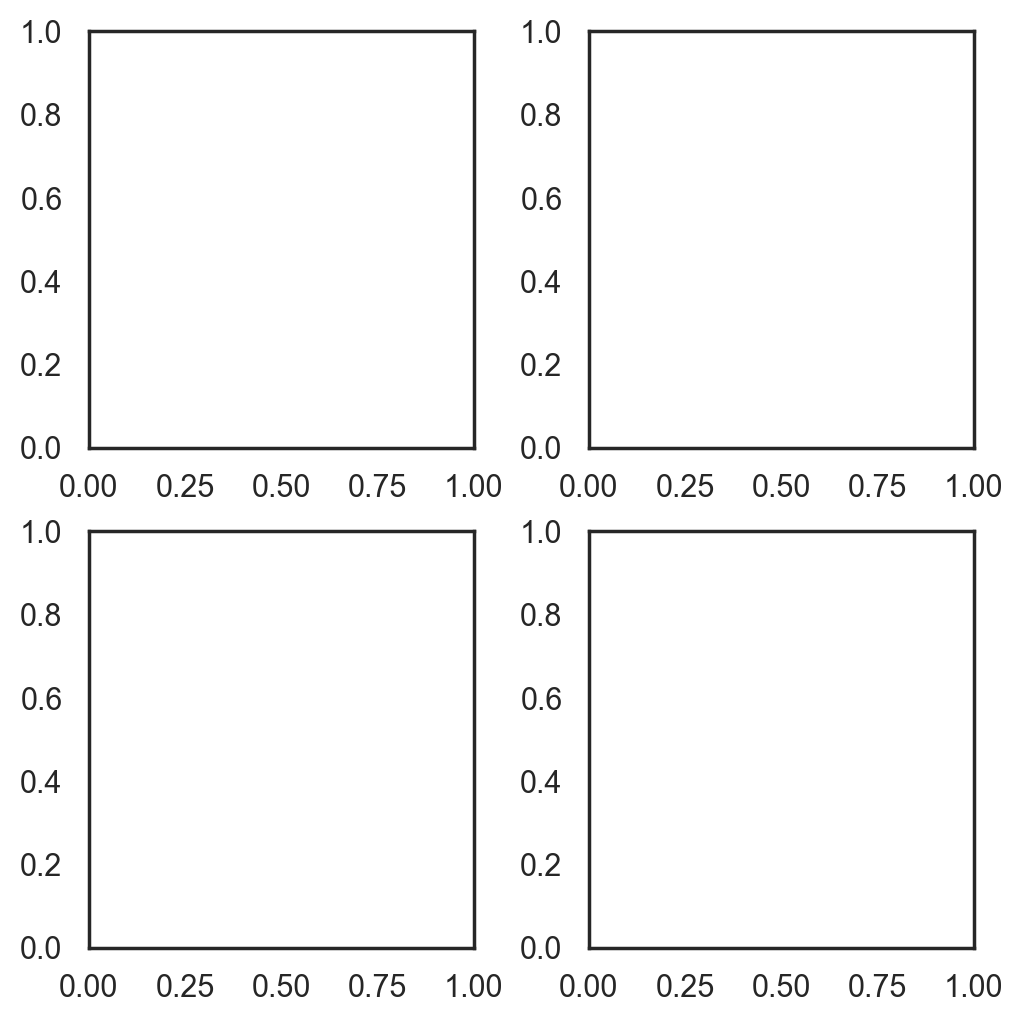

In [148]:
# To create a figure with multiple axes, we need the subplots function.
# We give it the configuration of subplots (2 by 2) and a constrained layout to make sure the plots don't overlap.
# This creates two variables, fig which is the entire figure, and axes which is a list of the axes.
# The first subplot is axes[0,0], the second is axes[0,1], the third is axes[1,0] and the fourth is axes[1,1].

fig, axes = plt.subplots(2, 2, figsize=(5, 5), constrained_layout=True)
plt.show()

We will need to edit our function a bit. 

In [149]:
# ---------------- NEW VERSION OF THE FUNCTION ----------------

# The only change is adding a new argument, axes, which we can use to plot to a specific axes. 

def hist_plot_by_species(penguin_data, variable_name, ax):
    """
    This function plots a scatter plot of body mass vs bill length for each species for a specific axis. 
    """
    species_list = penguin_data["species"].unique().tolist()

    colour_dict = {"Adelie"    :  "coral", 
                   "Gentoo"    :  "lightseagreen", 
                   "Chinstrap" :  "mediumorchid"}
    axis_label_dict = {"body_mass_g"      : "Body mass (g)",
                        "bill_length_mm"  : "Bill length (mm)",     
                        "bill_depth_mm"   : "Bill depth (mm)",
                        "flipper_length_mm" : "Flipper length (mm)"}

    for species in species_list:
        species_only = penguin_data[penguin_data["species"] == species]

        # Now we specify the axis the function was given is the one we're plotting to. It is ax.hist not plt.hist
        ax.hist(species_only[variable_name],
                    bins = 10, 
                    label = species,
                    color = colour_dict[species],
                    alpha = 0.5)

    # We also add the axis labels to the axis we're plotting to.
    ax.set_xlabel(axis_label_dict[variable_name])
    # Too many legends for every subplot doesn't make much sense. 
    # ax.legend()

Now we can use our function for the different subplots:

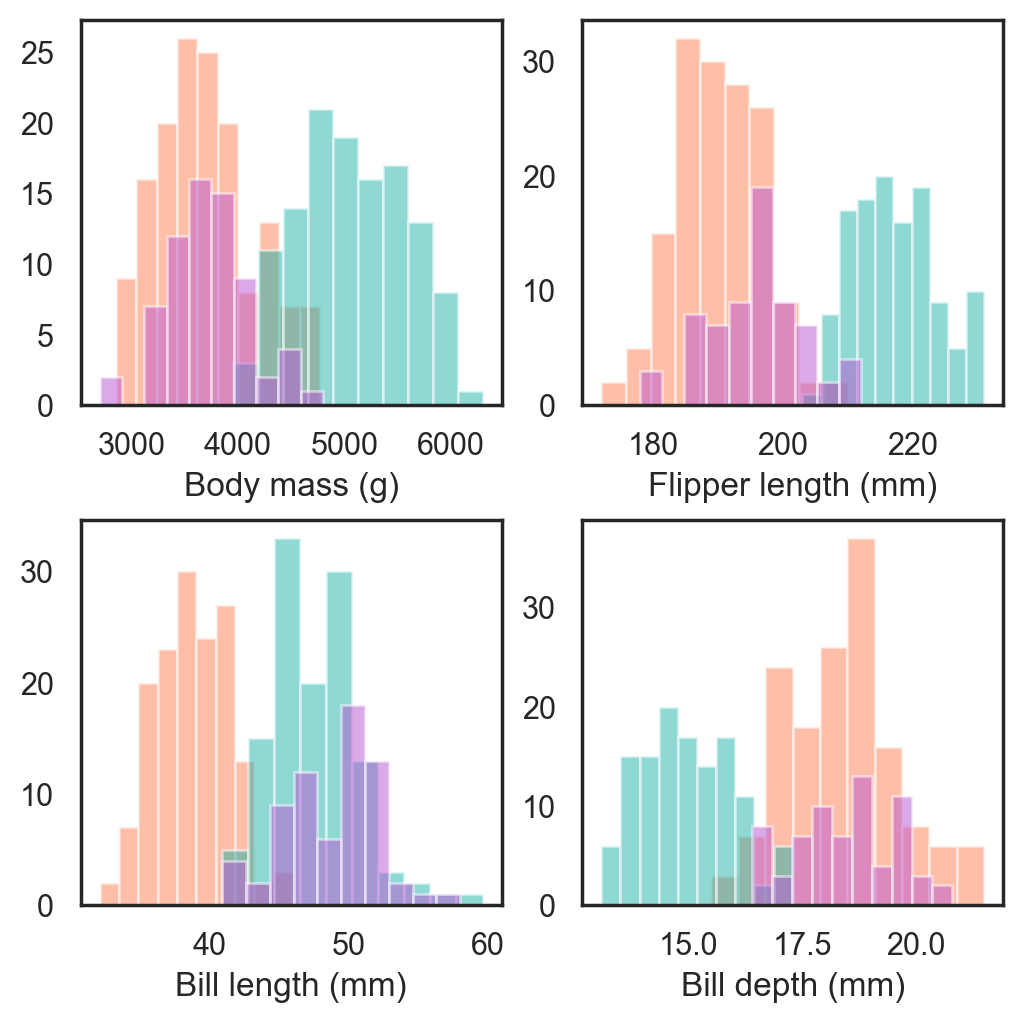

In [150]:
fig, axes = plt.subplots(2, 2, figsize=(5, 5), constrained_layout=True)

hist_plot_by_species(penguins, "body_mass_g", axes[0,0])

hist_plot_by_species(penguins, "flipper_length_mm", axes[0,1])

hist_plot_by_species(penguins, "bill_length_mm", axes[1,0])

hist_plot_by_species(penguins, "bill_depth_mm", axes[1,1])



We need another loop. 

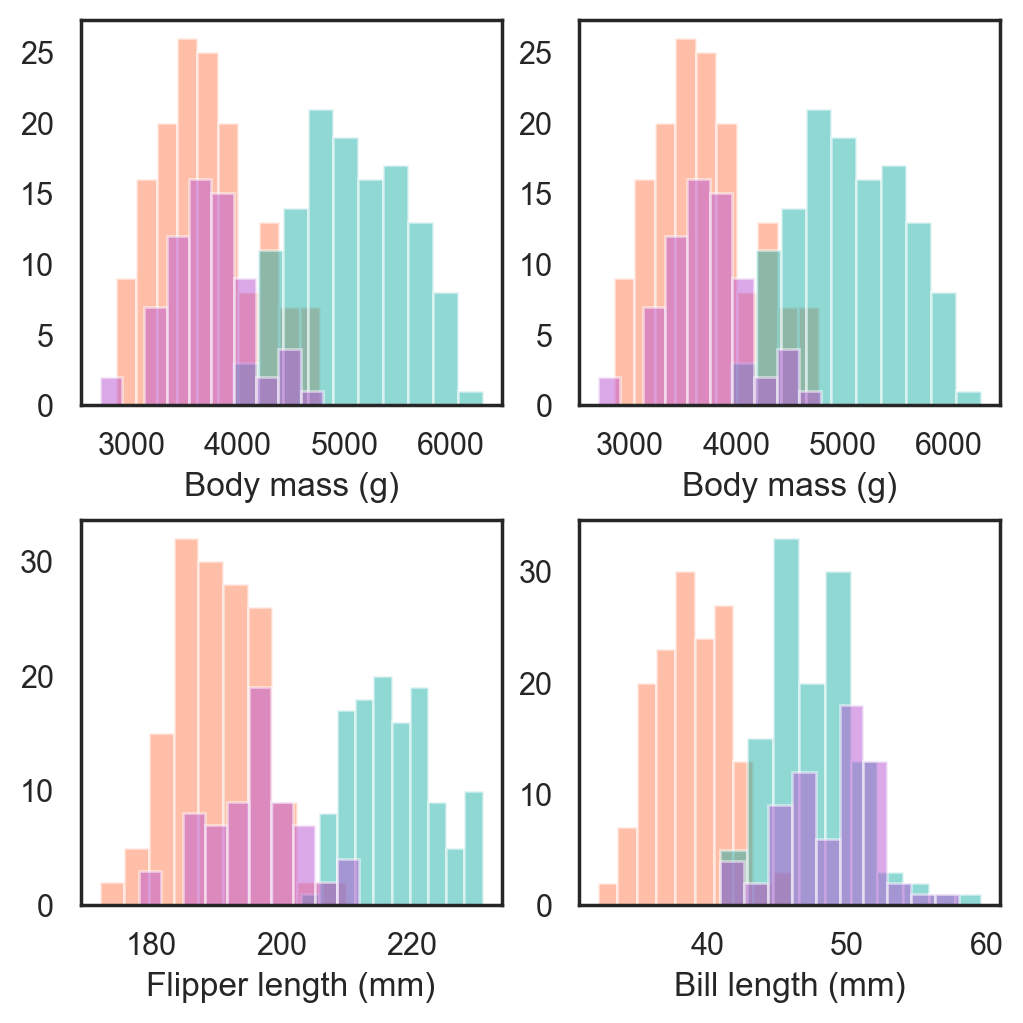

In [151]:

fig, axes = plt.subplots(2, 2, figsize=(5, 5), constrained_layout=True)

variable_list = ["body_mass_g", 
                 "body_mass_g", 
                 "flipper_length_mm", 
                 "bill_length_mm"]


# This time we're using the enumerate function to cycle through each axis and also a counter number. We can use that to cycle through our other lists (x and y variables)
# Flatten is a function that turns a 2D array into a 1D array -- axes[0,0] into axes[0] and axes[1,0] into axes[1].
for counter, current_ax in enumerate(axes.flatten()):
    hist_plot_by_species(penguins, 
                         variable_list[counter],
                         current_ax)


# Statistical Tests in Python

## A quick function for interpreting p-values

In [152]:
def p_value_to_words(p_value):

    # We can use the round() function to round the number to a certain number of decimal places.  We will use this for printing, so we will also make it a string. 
    p_value_rounded = str(round(p_value, 3))

    # We then indent the code block. This is the code that will run when we call the function. We will need to indent again within the if statement. 
    if p_value >= 0.05:
        print(":( We cannot reject the null hypothesis. p-value = " + p_value_rounded + " :(")
    elif p_value < 0.001:
        print("*** The p-value is smaller than the critical threshold. p-value is < 0.001." + " ***")
    elif p_value < 0.05:
        print("* The p-value is smaller than the critical threshold. p-value = " + p_value_rounded + ". *")
    else:
        print("Your p-value defies maths. I don't know what to do with it.")

# Nothing happens when we have only defined the function. We have to call the function by using the name we gave it and putting the p-value in the brackets.
p_value_to_words(0.05)
p_value_to_words(0.01)
p_value_to_words(0.00001)
p_value_to_words(0.23675423)
p_value_to_words(1)

:( We cannot reject the null hypothesis. p-value = 0.05 :(
* The p-value is smaller than the critical threshold. p-value = 0.01. *
*** The p-value is smaller than the critical threshold. p-value is < 0.001. ***
:( We cannot reject the null hypothesis. p-value = 0.237 :(
:( We cannot reject the null hypothesis. p-value = 1 :(



## T test

Important! Make sure your dataframe doesn't have missing values (NA)

In [153]:
import scipy.stats as stats

adelie_body_mass = penguins_clean[penguins_clean["species"] == "Adelie"]["body_mass_g"]

gentoo_body_mass = penguins_clean[penguins_clean["species"] == "Gentoo"]["body_mass_g"]

ttest_result = stats.ttest_ind(adelie_body_mass, gentoo_body_mass)

print(ttest_result)

p_value_to_words(ttest_result.pvalue)

Ttest_indResult(statistic=-23.466803147391744, pvalue=1.8806652580952688e-66)
*** The p-value is smaller than the critical threshold. p-value is < 0.001. ***


## ANOVA 

![](https://3.bp.blogspot.com/-PDWTzbbwx54/XEbYzExO9rI/AAAAAAAAAAM/AOvAPbXYVUcxmVKnWWrtQaiZ0qhIHo9vwCLcBGAs/s1600/ANOVA.png)

This is a way of doing multiple T-tests, comparing each species with each other. You could do this by running a lot of T-tests but it's easier this way!

In [154]:
# OLS means Ordinary Least Squares. It is a method for fitting a line to data.
# ANOVA is a kind of regression! 

from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as multi


# Make sure you have run this line
penguins_clean["species"] = penguins_clean["species"].astype("category")

# First we need to make a formula. This is a string that tells the function what to do.
# We use the ~ to say "is related to".
# The fit() function then fits the model to the data.
anova = ols('body_mass_g ~ C(species)', data=penguins_clean).fit()

# Here the p-value isn't very helpful, it just defines whether there is a difference between the groups or not.
p_value_to_words(anova.f_pvalue)
print("The F-statistics is " + str(round(anova.fvalue,2)))

# To find out which groups are different, we need to use the Tukey HSD test.
# This is a post-hoc test, which means it is a test that is done after the main test.
multi_comparison = multi.MultiComparison(penguins_clean["body_mass_g"],penguins_clean["species"])
results = multi_comparison.tukeyhsd()

# Here is a nice anova table.
print(results)

*** The p-value is smaller than the critical threshold. p-value is < 0.001. ***
The F-statistics is 341.89


/var/folders/rz/c636wrk93fj69j7c9b_r__2h0000gr/T/ipykernel_72900/1683678949.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins_clean["species"] = penguins_clean["species"].astype("category")


      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1    group2   meandiff p-adj    lower     upper   reject
---------------------------------------------------------------
   Adelie Chinstrap   26.9239 0.9164 -132.3528  186.2005  False
   Adelie    Gentoo 1386.2726    0.0 1252.2897 1520.2554   True
Chinstrap    Gentoo 1359.3487    0.0 1194.4304 1524.2671   True
---------------------------------------------------------------


# Looking for Relationships in the Data

First, we should look for relationships between the variables. We could plot these as scatter plots one by one but there's an inbuilt pair plotting function as part of `seaborn`. 

It will take a little bit longer to run.

/var/folders/rz/c636wrk93fj69j7c9b_r__2h0000gr/T/ipykernel_72900/1748864136.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins_clean["species"] = penguins_clean["species"].astype("category")
/var/folders/rz/c636wrk93fj69j7c9b_r__2h0000gr/T/ipykernel_72900/1748864136.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins_clean["island"] = penguins_clean["island"].astype("category")
/var/folders/rz/c636wrk93fj69j7c9b_r__2h0000gr/T/ipykernel_72900/1748864136.py:5: SettingWithCopyWarning: 
A val

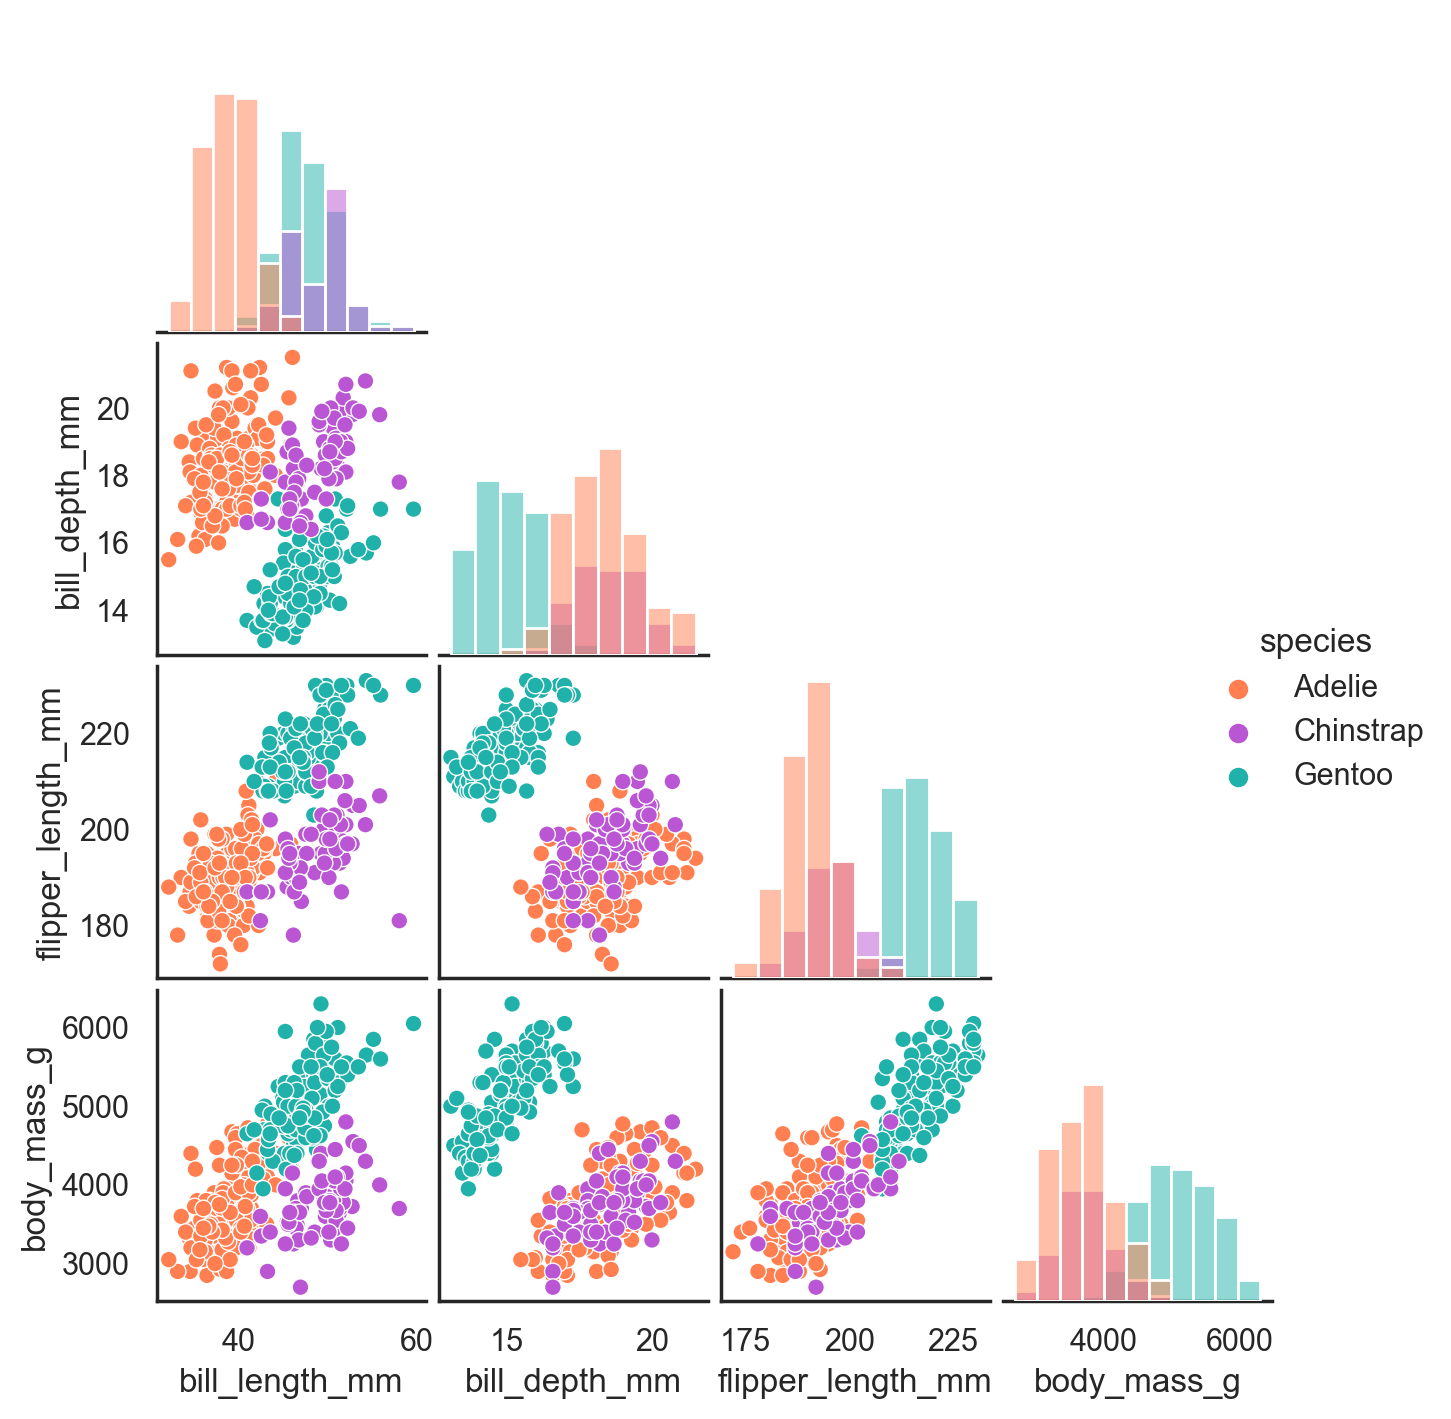

In [155]:
import seaborn as sns

penguins_clean["species"] = penguins_clean["species"].astype("category")
penguins_clean["island"] = penguins_clean["island"].astype("category")
penguins_clean["year"] = penguins_clean["year"].astype("category")


figure = sns.pairplot(penguins_clean, hue="species", diag_kind="hist", corner=True, palette=colour_dict)

# Just making sure it's a reasonable size. 
figure.fig.set_figheight(7)
figure.fig.set_figwidth(7)

# Linear Regression

Because stats tests are almost always some kind of regression, you'll notice this looks almost the same as anova. 

**ANOVA**

> CATEGORICAL PREDICTOR --> CONTINOUS RESPONSE

`body_mass_g ~ C(species)`

**LINEAR REGRESSION**

> CONTINUOUS PREDICTOR --> CONTINUOUS RESPONSE

`body_mass_g ~ bill_length_mm`

**MULTIPLE LINEAR REGRESSION**

> CONTINUOUS PREDICTOR --> CONTINUOUS RESPONSES

`body_mass_g ~ bill_length_mm + bill_depth_mm`




In [156]:
linear_model = ols('body_mass_g ~ bill_length_mm', data = penguins_clean).fit()

linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     176.2
Date:                Mon, 21 Nov 2022   Prob (F-statistic):           1.54e-32
Time:                        17:14:18   Log-Likelihood:                -2629.1
No. Observations:                 333   AIC:                             5262.
Df Residuals:                     331   BIC:                             5270.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        388.8452    289.817      1.342      0.181    -181.271     958.961
bill_length_mm    86.7918      6.538     13.276      0.000      73.931      99.652
==============================================================================
Omnibus:                        6.141   Durbin-Watson:                   0.849
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                4.899
Skew:                          -0.197   Prob(JB):                       0.0864
Kurtosis:                       2.555   Cond. No.                         360.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## How to interpret these results

The model coefficient is the slope of the line -- how much the body mass changes for each unit change in bill length. So for every mm increase in bill length, the body mass increases by 86g.

The intercept is the y intercept of the line -- the body mass when the bill length is 0 (388g).

It would be nice to plot our linear regression results.

We can use the seaborn library to do this. We can use the lmplot() function to plot a linear regression.


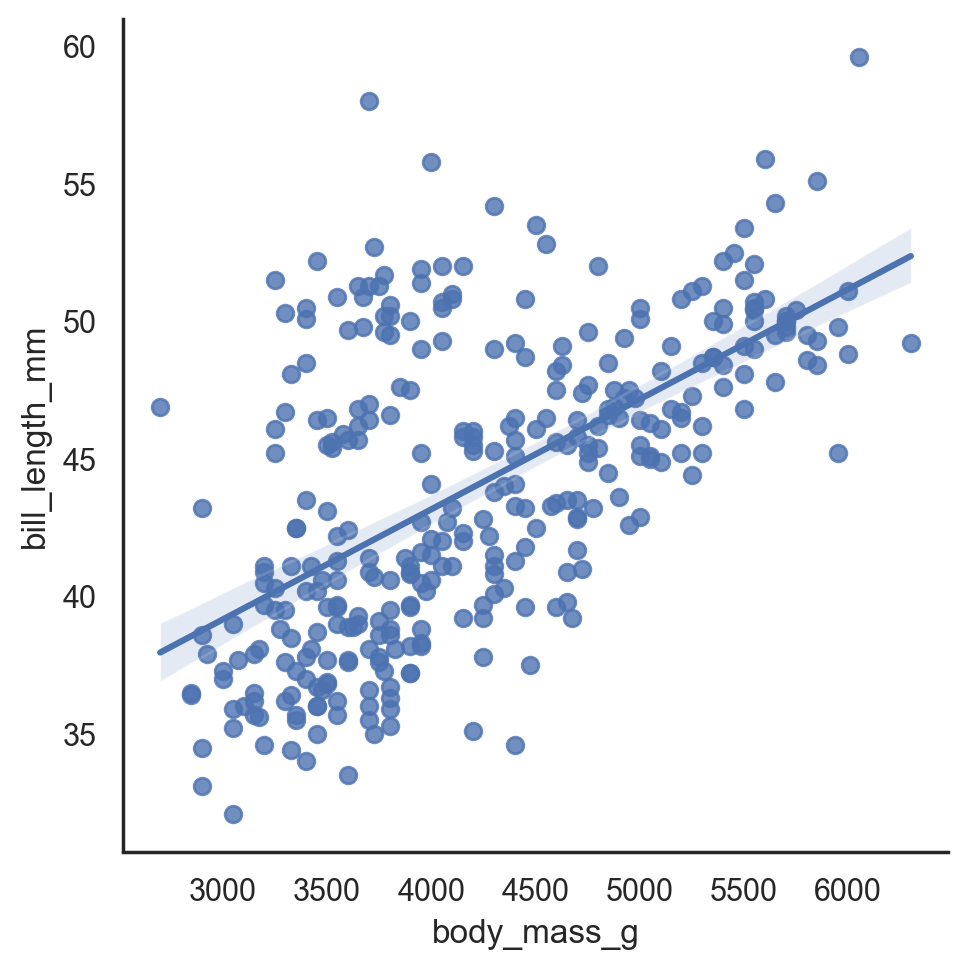

In [157]:
sns.lmplot(x="body_mass_g",y="bill_length_mm", data = penguins_clean)

## Taking into Account Groups

We can calculate each linear regression for each species individually. This means each species gets its own slope and intercept individually. 

This is called a Linear Mixed Effects Model. 

It looks like this in a plot:

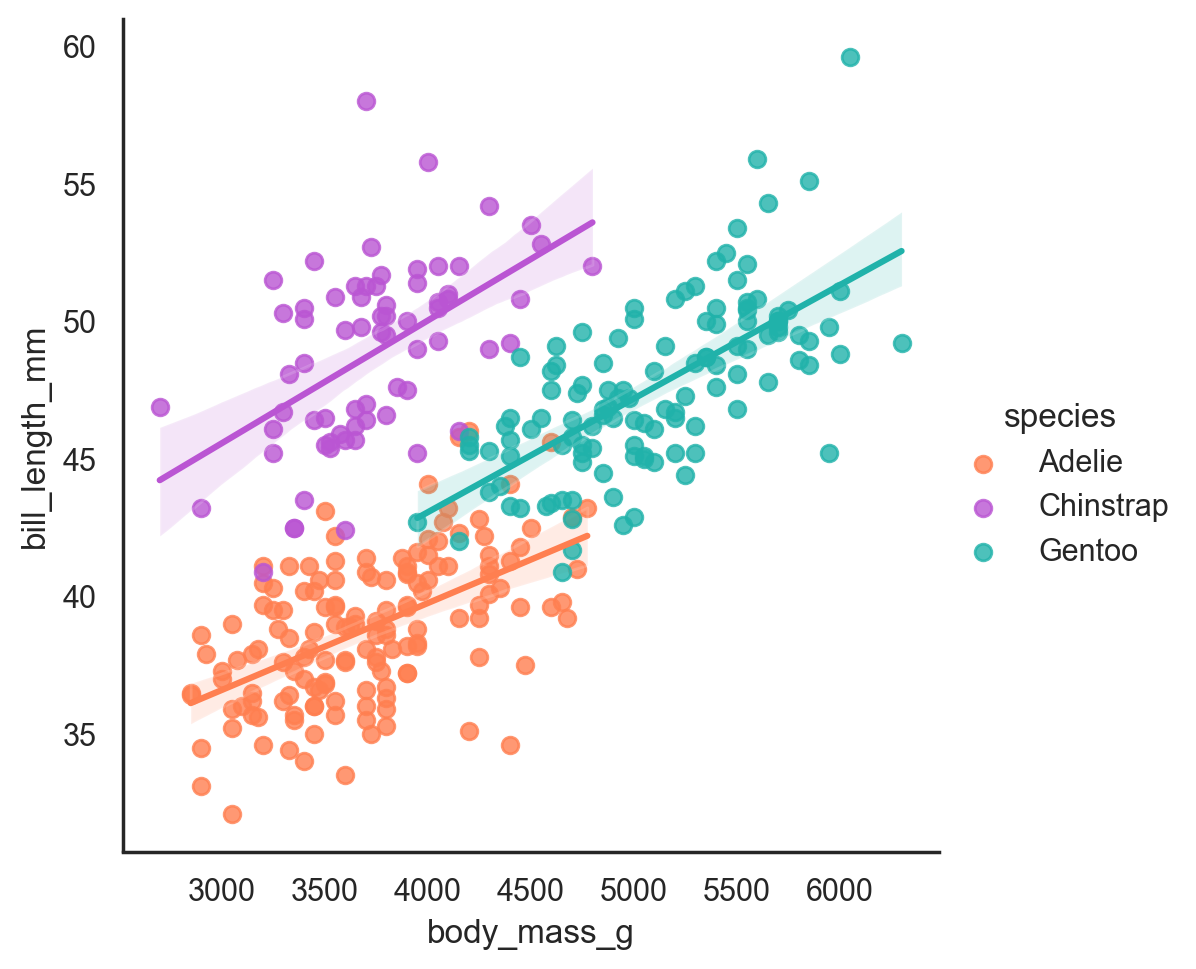

In [158]:
sns.lmplot(x="body_mass_g",y="bill_length_mm", 
           data = penguins_clean, 
           hue = "species", 
           palette = colour_dict)

To run this model... 

In [159]:
def linear_model_by_species(penguin_data, species_name, x_variable, y_variable):
    # This function will take a dataframe, a species name, and two variables. It will then make a linear model of the two variables and plot the data and the model.
    # It will also print the model summary.
    
    # First we need to filter the dataframe to only include the species we want to look at.
    species_only = penguin_data[penguin_data["species"] == species_name]
    
    # Then we make the linear model.
    linear_model = ols(y_variable + ' ~ ' + x_variable, data = species_only).fit()
    return linear_model

# Loop through each species. 

for species in penguins_clean["species"].unique():
    lm_result = linear_model_by_species(penguins_clean, species, "bill_length_mm", "body_mass_g")
    print(species)
    # We want to print the intercepts and slopes
    print("Intercept: " + str(round(lm_result.params[0],2)))
    print("Slope: " + str(round(lm_result.params[1],5)))
    print("\n") # This is just a blank line to make it easier to read.



Adelie
Intercept: 66.45
Slope: 93.74913


Gentoo
Intercept: -27.9
Slope: 107.64226


Chinstrap
Intercept: 846.14
Slope: 59.11773




### Using the groupby() method

This is a little more advanced. 

In [160]:
# Here is an advanced way of running a function on each group using the groupby() function.

# We can use the groupby() function to group the data by species.
# Then we can use the apply() function to run a function on each group.
# The function we want to run is the linear_model_by_species() function we made above.

def linear_model_advanced(penguin_data, x_variable, y_variable):

    # This function will take a dataframe, and two variables. It will then make a linear model of the two variables and plot the data and the model.
    
    # Then we make the linear model.
    linear_model = ols(y_variable + ' ~ ' + x_variable, data = penguin_data).fit()
    print(penguin_data["species"].unique().tolist()[0])
    print("Intercept: " + str(round(linear_model.params[0],2)))
    print("Slope: " + str(round(linear_model.params[1],2)))
    print("\n") # This is just a blank line to make it easier to read.


# First groupby() splits the data by the each category. 
penguin_groups = penguins_clean.groupby("species")

# apply() has a function as an argument, followed by the arguments the function needs, and then applies it to each group.
penguin_groups.apply(linear_model_advanced, x_variable = "bill_length_mm", y_variable = "body_mass_g")

Adelie
Intercept: 66.45
Slope: 93.75


Chinstrap
Intercept: 846.14
Slope: 59.12


Gentoo
Intercept: -27.9
Slope: 107.64




""


## Multiple Regression

Similar to a normal linear regression, we can simply add another variable:


In [161]:
multi_model = ols('body_mass_g ~ bill_length_mm + flipper_length_mm', data = penguins_clean).fit()

multi_model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     530.4
Date:                Mon, 21 Nov 2022   Prob (F-statistic):          8.15e-104
Time:                        17:14:20   Log-Likelihood:                -2460.6
No. Observations:                 333   AIC:                             4927.
Df Residuals:                     330   BIC:                             4939.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5836.2987    312.604    -18.670      0.000   -6451.246   -5221.352
bill_length_mm        4.9586      5.214      0.951      0.342      -5.297      15.214
flipper_length_mm    48.8897      2.034     24.034      0.000      44.888      52.891
==============================================================================
Omnibus:                        5.790   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.055   Jarque-Bera (JB):                5.729
Skew:                           0.321   Prob(JB):                       0.0570
Kurtosis:                       3.031   Cond. No.                     2.99e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Linear Mixed Effects Model

This allows us to make the slopes and/or the intercepts vary for each group.

For example, this is a model for different intercepts but same slope...

In [162]:
import statsmodels.api as sm

lmm_model = sm.MixedLM.from_formula("body_mass_g ~ bill_length_mm", 
                                    data = penguins_clean,
                                    groups = "species").fit()

lmm_model.summary()

# The default option here with no further arguments is different intercepts, same slope. 

lmm_model.random_effects.values()

dict_values([species    91.832422
dtype: float64, species   -780.422436
dtype: float64, species    688.590014
dtype: float64])